In [596]:
import mlflow
import numpy as np
from pprint import pprint
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [597]:
all_runs = mlflow.search_runs(search_all_experiments=True)

In [598]:
all_runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.exact_correct,metrics.exact_recall,metrics.strict_possible,metrics.ent_type_missed,...,params.number_of_examples_for_original_dataset,params.task,params.k_shot,params.use_redis_caching,params.number_of_examples,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.git.commit
0,c8d5bb849e5b4ade8e052677c6b81b0c,0,FINISHED,mlflow-artifacts:/0/c8d5bb849e5b4ade8e052677c6...,2024-07-25 05:54:34.164000+00:00,2024-07-25 05:54:34.240000+00:00,536.0,0.840125,638.0,27.0,...,200,ner,15,True,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/ner_runner.py,meta-llama/Meta-Llama-3-8B-Instruct__38ee03,LOCAL,c074ae83bffd6c65a88fa65a1f5985dc933824ba
1,3199279ab7374e509322f25192de6901,0,FINISHED,mlflow-artifacts:/0/3199279ab7374e509322f25192...,2024-07-25 05:43:17.312000+00:00,2024-07-25 05:43:17.393000+00:00,476.0,0.856115,556.0,15.0,...,200,ner,15,True,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/ner_runner.py,gpt-4o-mini__49a668,LOCAL,c074ae83bffd6c65a88fa65a1f5985dc933824ba
2,660cc8b845da41f282218b7b7e30c2f0,0,FINISHED,mlflow-artifacts:/0/660cc8b845da41f282218b7b7e...,2024-07-25 05:41:27.983000+00:00,2024-07-25 05:41:28.058000+00:00,395.0,0.706619,559.0,121.0,...,200,ner,15,True,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/ner_runner.py,mistralai/Mixtral-8x22B-Instruct-v0.1__13ca1a,LOCAL,c074ae83bffd6c65a88fa65a1f5985dc933824ba
3,967945613f0045f3bba4687ce192dd3e,0,FINISHED,mlflow-artifacts:/0/967945613f0045f3bba4687ce1...,2024-07-25 05:40:14.337000+00:00,2024-07-25 05:40:14.422000+00:00,458.0,0.803509,570.0,46.0,...,200,ner,15,True,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/ner_runner.py,meta-llama/Meta-Llama-3-70B-Instruct__a8bfa9,LOCAL,c074ae83bffd6c65a88fa65a1f5985dc933824ba
4,875434d340f54c52b49c555cbe729ea2,0,FINISHED,mlflow-artifacts:/0/875434d340f54c52b49c555cbe...,2024-07-25 05:35:53.686000+00:00,2024-07-25 05:35:53.759000+00:00,893.0,0.912155,979.0,33.0,...,200,ner,15,True,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/ner_runner.py,meta-llama/Meta-Llama-3-8B-Instruct__90d59d,LOCAL,c074ae83bffd6c65a88fa65a1f5985dc933824ba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,c1e4f67be2d34c38805c33e716483090,0,FINISHED,mlflow-artifacts:/0/c1e4f67be2d34c38805c33e716...,2024-07-07 11:46:19.095000+00:00,2024-07-07 11:46:19.180000+00:00,775.0,0.876697,884.0,49.0,...,None,None,5,None,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,claude-3-haiku-20240307__22025c,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
685,ce8147c316704145a269224fc52defe1,0,FINISHED,mlflow-artifacts:/0/ce8147c316704145a269224fc5...,2024-07-07 11:46:19.077000+00:00,2024-07-07 11:46:19.130000+00:00,562.0,0.691267,813.0,213.0,...,None,None,5,None,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,gpt-3.5-turbo__715580,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
686,177d28f8ca57473eba1f18cd74a81569,0,FINISHED,mlflow-artifacts:/0/177d28f8ca57473eba1f18cd74...,2024-07-07 11:46:18.699000+00:00,2024-07-07 11:46:18.782000+00:00,789.0,0.914253,863.0,33.0,...,None,None,5,None,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,claude-3-5-sonnet-20240620__cb2bef,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
687,289cd9e47d174837bf214b5e56523a11,0,FINISHED,mlflow-artifacts:/0/289cd9e47d174837bf214b5e56...,2024-07-07 11:46:18.699000+00:00,2024-07-07 11:46:18.774000+00:00,444.0,0.514484,863.0,363.0,...,None,None,5,None,200,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,mistralai/Mixtral-8x7B-Instruct-v0.1__c21121,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed


In [528]:
all_runs[(all_runs["params.dataset"] == "crossner_literature") & (all_runs["params.llm"] == "gpt-4o")][["params.method", "metrics.partial_f1", "metrics.exact_f1"]]#, "metrics.exact_f1"]

,params.method,metrics.partial_f1,metrics.exact_f1
5,gpt-4o,0.817931,0.763218
30,meta-llama/Meta-Llama-3-8B-Instruct,0.805070,0.784965
31,mistralai/Mixtral-8x22B-Instruct-v0.1,0.812363,0.798687
32,gpt-4o-mini,0.769340,0.759434
33,meta-llama/Meta-Llama-3-70B-Instruct,0.856009,0.839002
34,gpt-4o,0.884187,0.871938
35,mistralai/Mixtral-8x7B-Instruct-v0.1,0.055767,0.055767
388,gpt-4o,0.890909,0.876643
389,claude-3-haiku-20240307,0.821123,0.801017
390,mistralai/Mixtral-8x7B-Instruct-v0.1,0.706057,0.685868


In [166]:
all_runs[(all_runs["params.dataset"] == "crossner_literature") & (all_runs["params.llm"] == "gpt-4o") & (all_runs["params.generated"] == "False")]

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.exact_correct,metrics.exact_recall,metrics.strict_possible,metrics.ent_type_missed,...,params.split,params.dataset,params.method,params.number_of_examples,params.use_mlflow,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.git.commit
0,a763d18907ea441fb103ece32e34e9cb,0,FINISHED,mlflow-artifacts:/0/a763d18907ea441fb103ece32e...,2024-07-09 09:52:27.546000+00:00,2024-07-09 09:52:27.663000+00:00,1629.0,0.684454,2380.0,521.0,...,test,crossner_literature,gpt-4o,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/runner.py,gpt-4o__2dc053,LOCAL,6981f3b0da211cac576856243ecca9d52348b1dd
37,ed3d9cca1f2e4e08b9157602ac5ef266,0,FINISHED,mlflow-artifacts:/0/ed3d9cca1f2e4e08b9157602ac...,2024-07-07 15:35:07.712000+00:00,2024-07-07 15:35:07.777000+00:00,1956.0,0.733683,2666.0,418.0,...,test,crossner_literature,claude-3-haiku-20240307,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,claude-3-haiku-20240307__fc6c3a,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
38,1c980bf677d54f268c1c8ec47518c4eb,0,FINISHED,mlflow-artifacts:/0/1c980bf677d54f268c1c8ec475...,2024-07-07 14:36:44.339000+00:00,2024-07-07 14:36:44.390000+00:00,1345.0,0.526007,2557.0,936.0,...,test,crossner_literature,mistralai/Mixtral-8x7B-Instruct-v0.1,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,mistralai/Mixtral-8x7B-Instruct-v0.1__a9071e,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
39,441e371992ec4419929e390126616ee5,0,FINISHED,mlflow-artifacts:/0/441e371992ec4419929e390126...,2024-07-07 14:31:04.127000+00:00,2024-07-07 14:31:04.185000+00:00,2056.0,0.788344,2608.0,250.0,...,test,crossner_literature,claude-3-5-sonnet-20240620,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,claude-3-5-sonnet-20240620__97edfc,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
40,8f33765ca8d942879c1d332cb97df40e,0,FINISHED,mlflow-artifacts:/0/8f33765ca8d942879c1d332cb9...,2024-07-07 14:27:18.886000+00:00,2024-07-07 14:27:18.986000+00:00,1084.0,0.464240,2335.0,1083.0,...,test,crossner_literature,gpt-3.5-turbo,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,gpt-3.5-turbo__80b5e4,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
41,3962e41400a54e75999efba9d6ee404c,0,FINISHED,mlflow-artifacts:/0/3962e41400a54e75999efba9d6...,2024-07-07 13:55:36.197000+00:00,2024-07-07 13:55:36.257000+00:00,1622.0,0.716748,2263.0,328.0,...,test,crossner_literature,gliner,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,gliner__cc24f0,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed


In [167]:
def find_dataframe_subset(df, dataset="crossner_politics", llm="gpt-4o",  generated="True"):
    df = df[(df["params.dataset"] == dataset) & (df["params.llm"] == llm) & (df["params.generated"] == generated)]
    return df[["params.method", "metrics.exact_f1"]]

In [270]:
def transform_to_dict(df):
    all_methods = []
    all_results = []
    for row in df.iterrows():
        all_methods.append(row[1][0])
        all_results.append(row[1][1])
    output_dict = {method:result for method, result in zip(all_methods, all_results)}
    return output_dict

In [169]:
gpt4o = transform_to_dict(find_dataframe_subset(all_runs, llm="gpt-4o"))
claude_haiku = transform_to_dict(find_dataframe_subset(all_runs, llm="claude-3-haiku-20240307"))
claude_sonnet = transform_to_dict(find_dataframe_subset(all_runs, llm="claude-3-5-sonnet-20240620"))
claude_mixtral = transform_to_dict(find_dataframe_subset(all_runs, llm="mistralai/Mixtral-8x7B-Instruct-v0.1"))
gpt35 = transform_to_dict(find_dataframe_subset(all_runs, llm="gpt-3.5-turbo"))
original = transform_to_dict(find_dataframe_subset(all_runs, llm="gpt-4o", generated="False"))

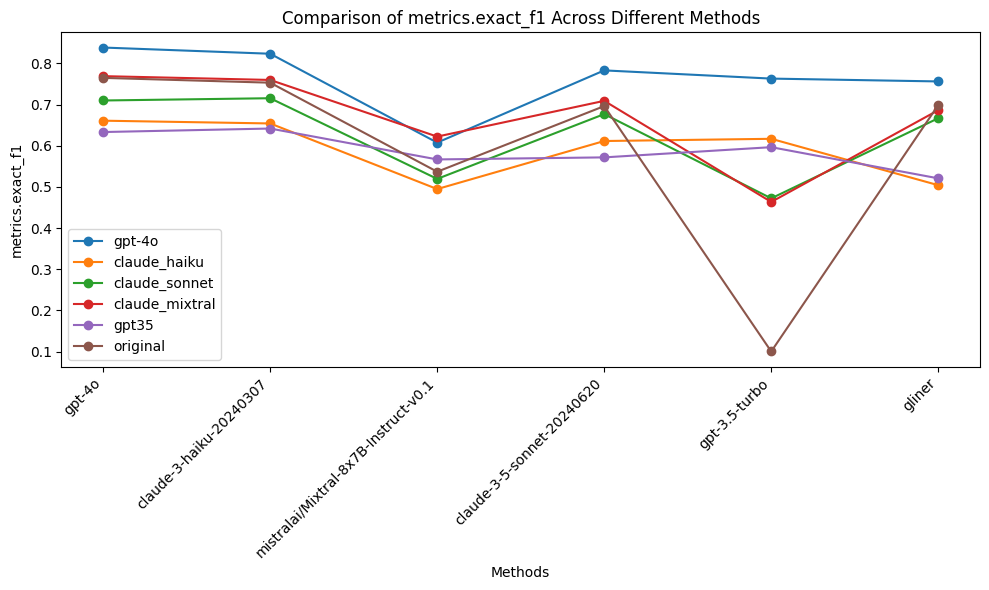

In [170]:
methods = list(gpt4o.keys())
plt.figure(figsize=(10, 6))

plt.plot(methods, [gpt4o[method] for method in methods], marker='o', label='gpt-4o')
plt.plot(methods, [claude_haiku[method] for method in methods], marker='o', label='claude_haiku')
plt.plot(methods, [claude_sonnet[method] for method in methods], marker='o', label='claude_sonnet')
plt.plot(methods, [claude_mixtral[method] for method in methods], marker='o', label='claude_mixtral')
plt.plot(methods, [gpt35[method] for method in methods], marker='o', label='gpt35')
plt.plot(methods, [original[method] for method in methods], marker='o', label='original')


plt.xlabel('Methods')
plt.ylabel('metrics.exact_f1')
plt.title('Comparison of metrics.exact_f1 Across Different Methods')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [273]:
def combined_graph(all_runs, dataset, measure):
    
    def temp(df, dataset=dataset, llm="gpt-4o",  generated="True"):
        if generated == "True":
            df = df[(df["params.dataset"] == dataset) & (df["params.llm"] == llm) & (df["params.generated"] == generated)]
        else:
            df = df[(df["params.dataset"] == dataset) & (df["params.generated"] == generated)]
            
        return df[["params.method", measure]]
    
    
    def transform_to_dict(df):
        all_methods = []
        all_results = []
        for row in df.iterrows():
            all_methods.append(row[1][0])
            all_results.append(row[1][1])
        output_dict = {method:result for method, result in zip(all_methods, all_results)}
        return output_dict
    
    gpt4o = transform_to_dict(temp(all_runs, llm="gpt-4o")) # performance of various models using gpt-4o data
    claude_haiku = transform_to_dict(temp(all_runs, llm="claude-3-haiku-20240307"))
    claude_sonnet = transform_to_dict(temp(all_runs, llm="claude-3-5-sonnet-20240620"))
    claude_mixtral = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x7B-Instruct-v0.1"))
    gpt35 = transform_to_dict(temp(all_runs, llm="gpt-3.5-turbo"))
    original = transform_to_dict(temp(all_runs, llm="gpt-4o", generated="False"))
    
    
    methods = list(gpt4o.keys())
    plt.figure(figsize=(10, 6))

    plt.plot(methods, [gpt4o[method] for method in methods], marker='o', label='gpt-4o-dataset')
    plt.plot(methods, [claude_haiku[method] for method in methods], marker='o', label='claude_haiku-dataset')
    plt.plot(methods, [claude_sonnet[method] for method in methods], marker='o', label='claude_sonnet-dataset')
    plt.plot(methods, [claude_mixtral[method] for method in methods], marker='o', label='mixtral-dataset')
    plt.plot(methods, [gpt35[method] for method in methods], marker='o', label='gpt35-dataset')
    plt.plot(methods, [original[method] for method in methods], marker='o', label='original-dataset')


    plt.xlabel('Methods')
    plt.ylabel(f'{measure}')
    plt.title(f'Comparison of {measure} Across Different Methods over {dataset}')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


    plt.show()

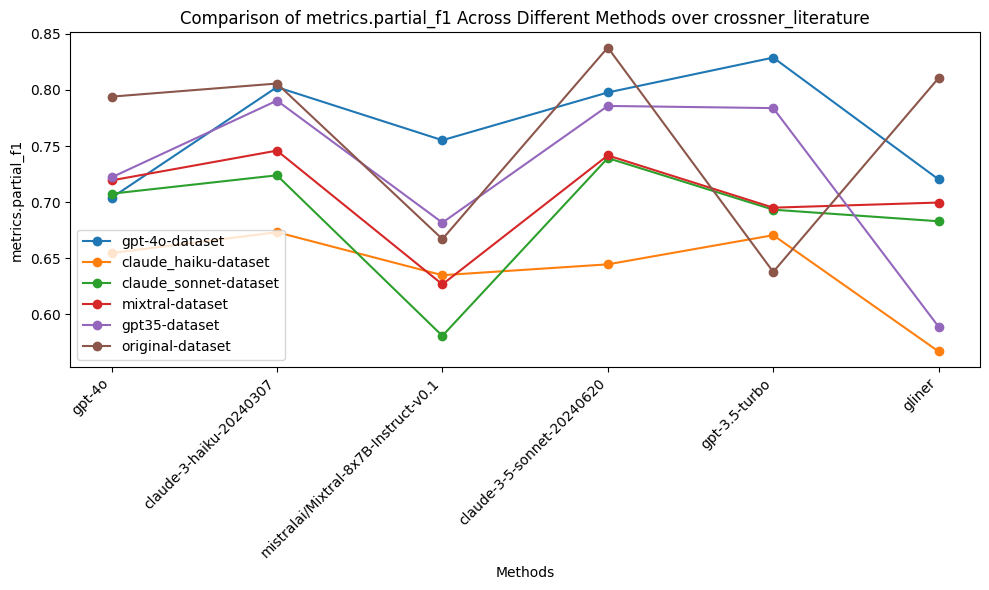

In [274]:
combined_graph(all_runs=all_runs, dataset="crossner_literature", measure="metrics.partial_f1")

In [295]:
def combined_graph(all_runs, dataset, measure, k_shot=15, number_of_examples=400):
    
    def temp(df, dataset=dataset, llm="gpt-4o",  generated="True"):
        if generated == "True":
            df = df[(df["params.dataset"] == dataset) & (df["params.llm"] == llm) & (df["params.generated"] == generated)]
            df = df[(df["params.k_shot"] == str(k_shot)) & (df["params.number_of_examples"] == str(number_of_examples))]
        else:
            df = df[(df["params.dataset"] == dataset) & (df["params.generated"] == generated) & (df["params.task"] == "ner")]
            
        return df[["params.method", measure]]
    
    def transform_to_dict(df):
        all_methods = []
        all_results = []
        for row in df.iterrows():
            all_methods.append(row[1][0])
            all_results.append(row[1][1])
        output_dict = {method:result for method, result in zip(all_methods, all_results)}
        return output_dict
    
    
    def find_avg_results(all_dicts):
        methods = all_dicts[0].keys()
        avg_results = {}
        for m in methods:
            temp_avg = []
            for all_dict in all_dicts:
                temp_avg.append(all_dict[m])
            avg_results[m] = np.mean(temp_avg)
        return avg_results
    
    # print(temp(all_runs, llm="gpt-4o"))
    
    
    gpt4o = transform_to_dict(temp(all_runs, llm="gpt-4o")) # performance of various models using gpt-4o data
    claude_haiku = transform_to_dict(temp(all_runs, llm="claude-3-haiku-20240307"))
    claude_sonnet = transform_to_dict(temp(all_runs, llm="claude-3-5-sonnet-20240620"))
    claude_mixtral = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x7B-Instruct-v0.1"))
    gpt35 = transform_to_dict(temp(all_runs, llm="gpt-3.5-turbo"))
    original = transform_to_dict(temp(all_runs, llm="gpt-4o", generated="False"))
    average_results = find_avg_results([gpt4o, claude_haiku, claude_mixtral, claude_sonnet, gpt35])
    # average_results = find_avg_results([gpt4o, claude_sonnet])
    
        
    dataset_to_results = {
        
        "original": original,
        "gpt4o": gpt4o,
        "claude_haiku": claude_haiku,
        "claude_sonnet": claude_sonnet,
        "claude_mixtral": claude_mixtral,
        "gpt35": gpt35,
        "average_results": average_results
    }
    
    
    all_methods = [m for m, r in gpt4o.items()]
    
    
    def get_results_from_method(method_name):
        temp_results = []
        for key, value in dataset_to_results.items():
            temp_results.append(value[method_name])
            
        return temp_results
    
    
    # print(dataset_to_results)
    
    
    
    # performance of gpt4 on various dataset
    # find the performance of gpt4 on 
    
    all_datasets = dataset_to_results.keys()
    
    
    methods = list(gpt4o.keys())
    plt.figure(figsize=(10, 6))
    
    

    plt.plot(all_datasets, get_results_from_method(method_name="gpt-4o"), marker='o', label='gpt-4o')
    plt.plot(all_datasets, get_results_from_method(method_name="claude-3-haiku-20240307"), marker='o', label='claude_haiku')
    plt.plot(all_datasets, get_results_from_method(method_name="claude-3-5-sonnet-20240620"), marker='o', label='claude_sonnet')
    plt.plot(all_datasets, get_results_from_method(method_name="mistralai/Mixtral-8x7B-Instruct-v0.1"), marker='o', label='mixtral')
    plt.plot(all_datasets, get_results_from_method(method_name="gpt-3.5-turbo"), marker='o', label='gpt-35')
    plt.plot(all_datasets, get_results_from_method(method_name="gliner"), marker='o', label='gliner')



    plt.xlabel('Dataset -> ')
    plt.ylabel(f'{measure}')
    plt.title(f'Comparison of {measure} Across Different Methods over {dataset} with k_shot as {k_shot}')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


    plt.show()

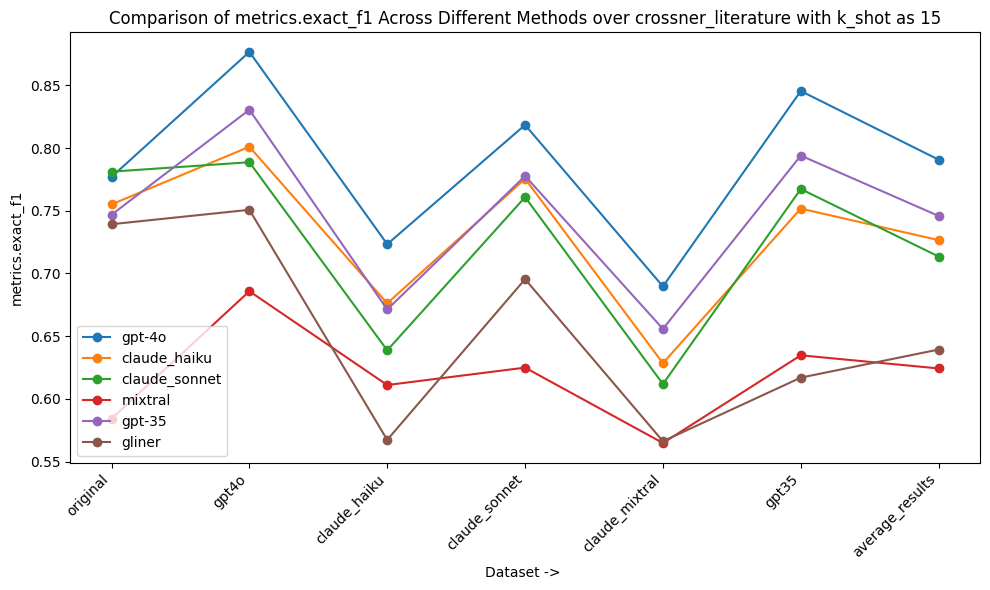

In [301]:
combined_graph(all_runs=all_runs, dataset="crossner_literature", measure="metrics.exact_f1", k_shot=15)

In [264]:
df = all_runs
dataset = "crossner_literature"
measure = "metrics.partial_f1"
llm = "gpt-4o"
generated = "True"
k_shot = "5"
number_of_examples = "400"
df = all_runs
# df = df[(df["params.dataset"] == dataset) & (df["params.llm"] == llm) & (df["params.generated"] == generated) & (df["params.number_of_examples"] == k_shot) ]
# df = df[(df["params.k_shot"] == k_shot) & (df["params.number_of_examples"] == number_of_examples)]
df

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.exact_correct,metrics.exact_recall,metrics.strict_possible,metrics.ent_type_missed,...,params.split,params.dataset,params.method,params.number_of_examples,params.use_mlflow,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.git.commit
0,cfe087d93c5c4d4a939669305749de0a,0,FINISHED,mlflow-artifacts:/0/cfe087d93c5c4d4a9396693057...,2024-07-16 14:26:36.012000+00:00,2024-07-16 14:26:36.079000+00:00,1567.0,0.962531,1628.0,10.0,...,test,crossner_literature,gpt-4o,400,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/combined_n...,gpt-4o__357063,LOCAL,81a62ba8de1be211f1f375889e6bc7b04d72dbbe
1,b9e48ec1cab8449a9ef6c01f59971748,0,FINISHED,mlflow-artifacts:/0/b9e48ec1cab8449a9ef6c01f59...,2024-07-16 14:18:27.130000+00:00,2024-07-16 14:18:27.183000+00:00,1733.0,0.943386,1837.0,17.0,...,test,crossner_literature,claude-3-haiku-20240307,400,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/combined_n...,claude-3-haiku-20240307__fb4e47,LOCAL,81a62ba8de1be211f1f375889e6bc7b04d72dbbe
2,f533085972084d7b87e37a5cdeeb8ad9,0,FINISHED,mlflow-artifacts:/0/f533085972084d7b87e37a5cde...,2024-07-16 14:03:33.887000+00:00,2024-07-16 14:03:33.963000+00:00,1274.0,0.689767,1847.0,498.0,...,test,crossner_literature,mistralai/Mixtral-8x7B-Instruct-v0.1,400,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/combined_n...,mistralai/Mixtral-8x7B-Instruct-v0.1__e6049f,LOCAL,81a62ba8de1be211f1f375889e6bc7b04d72dbbe
3,a73b616b3c8c454080c48cb248cf2731,0,FINISHED,mlflow-artifacts:/0/a73b616b3c8c454080c48cb248...,2024-07-16 13:49:24.673000+00:00,2024-07-16 13:49:24.771000+00:00,1620.0,0.946815,1711.0,2.0,...,test,crossner_literature,claude-3-5-sonnet-20240620,400,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/combined_n...,claude-3-5-sonnet-20240620__79f3e1,LOCAL,81a62ba8de1be211f1f375889e6bc7b04d72dbbe
4,4b5801a1d8bb43eeb0e2ab74c31ee93b,0,FINISHED,mlflow-artifacts:/0/4b5801a1d8bb43eeb0e2ab74c3...,2024-07-16 13:47:52.641000+00:00,2024-07-16 13:47:52.754000+00:00,1514.0,0.938042,1614.0,24.0,...,test,crossner_literature,gpt-3.5-turbo,400,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/combined_n...,gpt-3.5-turbo__5d86eb,LOCAL,81a62ba8de1be211f1f375889e6bc7b04d72dbbe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,c1e4f67be2d34c38805c33e716483090,0,FINISHED,mlflow-artifacts:/0/c1e4f67be2d34c38805c33e716...,2024-07-07 11:46:19.095000+00:00,2024-07-07 11:46:19.180000+00:00,775.0,0.876697,884.0,49.0,...,test,crossner_literature,claude-3-haiku-20240307,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,claude-3-haiku-20240307__22025c,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
201,ce8147c316704145a269224fc52defe1,0,FINISHED,mlflow-artifacts:/0/ce8147c316704145a269224fc5...,2024-07-07 11:46:19.077000+00:00,2024-07-07 11:46:19.130000+00:00,562.0,0.691267,813.0,213.0,...,test,crossner_literature,gpt-3.5-turbo,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,gpt-3.5-turbo__715580,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
202,177d28f8ca57473eba1f18cd74a81569,0,FINISHED,mlflow-artifacts:/0/177d28f8ca57473eba1f18cd74...,2024-07-07 11:46:18.699000+00:00,2024-07-07 11:46:18.782000+00:00,789.0,0.914253,863.0,33.0,...,test,crossner_literature,claude-3-5-sonnet-20240620,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,claude-3-5-sonnet-20240620__cb2bef,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed
203,289cd9e47d174837bf214b5e56523a11,0,FINISHED,mlflow-artifacts:/0/289cd9e47d174837bf214b5e56...,2024-07-07 11:46:18.699000+00:00,2024-07-07 11:46:18.774000+00:00,444.0,0.514484,863.0,363.0,...,test,crossner_literature,mistralai/Mixtral-8x7B-Instruct-v0.1,200,True,gmaheshw,/Users/gmaheshw/codes/synthetic/src/shell_runn...,mistralai/Mixtral-8x7B-Instruct-v0.1__c21121,LOCAL,81269ac1da99ca455b6fd6b058a0e092642272ed


In [267]:
df[(df["params.number_of_examples"] == 400)]

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.exact_correct,metrics.exact_recall,metrics.strict_possible,metrics.ent_type_missed,...,params.split,params.dataset,params.method,params.number_of_examples,params.use_mlflow,tags.mlflow.user,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.git.commit


In [338]:
def combined_graph_intent(all_runs, dataset, measure, number_of_examples_per_intent=1):
    
    def temp(df, dataset=dataset, llm="gpt-4o",  generated="True"):
        if generated == "True":
            df = df[(df["params.dataset"] == dataset) & (df["params.llm"] == llm) & (df["params.generated"] == generated)]
            df = df[(df["params.number_of_examples_per_intent"] == str(number_of_examples_per_intent))]
        else:
            df = df[(df["params.dataset"] == dataset) & (df["params.generated"] == generated)]
            
        print(df["params.k_shot"])
        # raise IOError  
        return df[["params.method", measure]]
    
    
    def transform_to_dict(df):
        all_methods = []
        all_results = []
        for row in df.iterrows():
            all_methods.append(row[1][0])
            all_results.append(row[1][1])
        output_dict = {method:result for method, result in zip(all_methods, all_results)}
        return output_dict
    
    
    def find_avg_results(all_dicts):
        methods = all_dicts[0].keys()
        avg_results = {}
        for m in methods:
            temp_avg = []
            for all_dict in all_dicts:
                temp_avg.append(all_dict[m])
            avg_results[m] = np.mean(temp_avg)
        return avg_results
    
    
    gpt4o = transform_to_dict(temp(all_runs, llm="gpt-4o")) # performance of various models using gpt-4o data
    # claude_haiku = transform_to_dict(temp(all_runs, llm="claude-3-haiku-20240307"))
    # claude_sonnet = transform_to_dict(temp(all_runs, llm="claude-3-5-sonnet-20240620"))
    claude_mixtral = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x7B-Instruct-v0.1"))
    gpt35 = transform_to_dict(temp(all_runs, llm="gpt-3.5-turbo"))
    original = transform_to_dict(temp(all_runs, llm="gpt-4o", generated="False"))
    # average_results = find_avg_results([gpt4o, claude_haiku, claude_mixtral, claude_sonnet, gpt35])
    # average_results = find_avg_results([gpt4o, claude_sonnet])
    
        
    dataset_to_results = {
        
        "original": original,
        "gpt4o": gpt4o,
        # "claude_haiku": claude_haiku,
        # "claude_sonnet": claude_sonnet,
        "claude_mixtral": claude_mixtral,
        "gpt35": gpt35,
        # "average_results": average_results
    }
    
    
    all_methods = [m for m, r in gpt4o.items()]
    
    
    def get_results_from_method(method_name):
        temp_results = []
        for key, value in dataset_to_results.items():
            temp_results.append(value[method_name])
            
        return temp_results
    
    
    
    
    # performance of gpt4 on various dataset
    # find the performance of gpt4 on 
    
    all_datasets = dataset_to_results.keys()
    
    
    methods = list(gpt4o.keys())
    plt.figure(figsize=(10, 6))
    
    

    plt.plot(all_datasets, get_results_from_method(method_name="gpt-4o"), marker='o', label='gpt-4o')
    plt.plot(all_datasets, get_results_from_method(method_name="claude-3-haiku-20240307"), marker='o', label='claude_haiku')
    plt.plot(all_datasets, get_results_from_method(method_name="claude-3-5-sonnet-20240620"), marker='o', label='claude_sonnet')
    plt.plot(all_datasets, get_results_from_method(method_name="mistralai/Mixtral-8x7B-Instruct-v0.1"), marker='o', label='mixtral')
    plt.plot(all_datasets, get_results_from_method(method_name="gpt-3.5-turbo"), marker='o', label='gpt-35')
    plt.plot(all_datasets, get_results_from_method(method_name="huggingface_bart_large"), marker='o', label='huggingface_bart_large')



    plt.xlabel('Dataset')
    plt.ylabel(f'{measure}')
    plt.title(f'Comparison of {measure} Across Methods over {dataset} and number of examples per intent {number_of_examples_per_intent}')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


    plt.show()

0    5
1    5
2    5
3    5
4    5
5    5
Name: params.k_shot, dtype: object
12    5
13    5
14    5
15    5
16    5
17    5
Name: params.k_shot, dtype: object
6     5
7     5
8     5
9     5
10    5
11    5
Name: params.k_shot, dtype: object
108    1
109    1
110    1
111    1
112    1
113    1
Name: params.k_shot, dtype: object


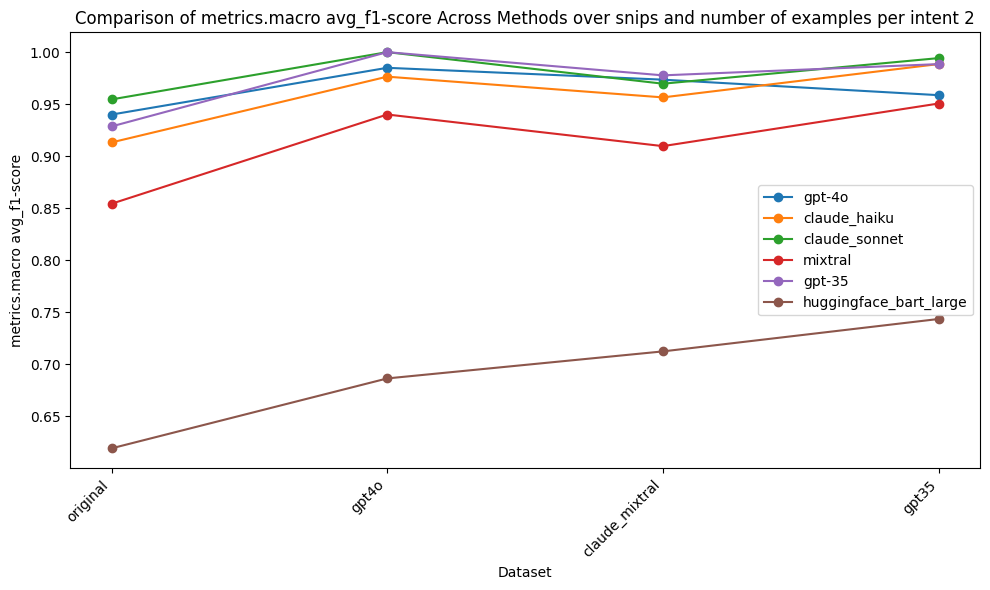

In [339]:
combined_graph_intent(all_runs, dataset="snips", measure="metrics.macro avg_f1-score", number_of_examples_per_intent=2)

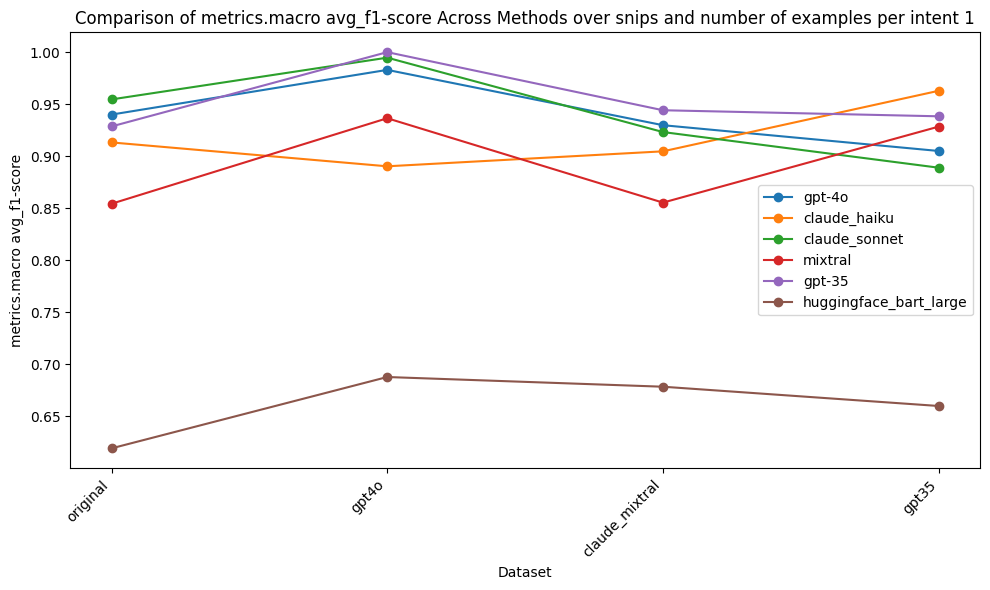

In [330]:
combined_graph_intent(all_runs, dataset="snips", measure="metrics.macro avg_f1-score", number_of_examples_per_intent=1)

In [543]:
def combined_graph_vn(all_runs, dataset, measure, k_shot=1, number_of_examples=200,  task="text_similarity", number_of_examples_for_original_dataset="200"):
    
    def temp(df, dataset=dataset, llm="gpt-4o",  generated="True"):
        df = df[(df["params.number_of_examples_for_original_dataset"] == number_of_examples_for_original_dataset)]
        if generated == "True":
            df = df[(df["params.dataset"] == dataset) & (df["params.llm"] == llm) & (df["params.generated"] == generated)]
            df = df[(df["params.number_of_examples_per_score"] == str(k_shot)) & (df["params.number_of_examples"] == str(number_of_examples))]
        else:
            df = df[(df["params.dataset"] == dataset) & (df["params.generated"] == generated) & (df["params.task"] == task)]
            
        return df[["params.method", measure]]
    
    def transform_to_dict(df):
        all_methods = []
        all_results = []
        for row in df.iterrows():
            all_methods.append(row[1][0])
            all_results.append(row[1][1])
        output_dict = {method:result for method, result in zip(all_methods, all_results)}
        return dict(sorted(output_dict.items()))
    
    
    def find_avg_results(all_dicts):
        methods = all_dicts[0].keys()
        avg_results = {}
        for m in methods:
            temp_avg = []
            for all_dict in all_dicts:
                temp_avg.append(all_dict[m])
            avg_results[m] = np.mean(temp_avg)
        return avg_results
    
    # print(temp(all_runs, llm="gpt-4o"))
    
    
    gpt4o = transform_to_dict(temp(all_runs, llm="gpt-4o")) # performance of various models using gpt-4o data
    gpt4omini = transform_to_dict(temp(all_runs, llm="gpt-4o-mini"))
    mixtral8x22B = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x22B-Instruct-v0.1"))
    mixtral8x7B = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x7B-Instruct-v0.1"))
    llama3_70B = transform_to_dict(temp(all_runs, llm="meta-llama/Meta-Llama-3-70B-Instruct"))
    llama3_8B = transform_to_dict(temp(all_runs, llm="meta-llama/Meta-Llama-3-8B-Instruct"))
    original = transform_to_dict(temp(all_runs, llm="", generated="False"))
    average_results = find_avg_results([gpt4o, gpt4omini, mixtral8x22B, mixtral8x7B, llama3_70B, llama3_8B])
    # average_results = find_avg_results([gpt4o, claude_sonnet])
    
        
    dataset_to_results = {
        
        "original": original,
        "gpt4o": gpt4o,
        "gpt4omini": gpt4omini,
        "mixtral8x22B": mixtral8x22B,
        "mixtral8x7B": mixtral8x7B,
        "llama3_70B": llama3_70B,
        "llama3_8B": llama3_8B,
        "average_results": average_results
    }
    
    print(dataset_to_results)
        
    
    # pr = pearsonr([value for key,value in gpt4o.items()], [value for key,value in original.items()])
    # print(pr)
    # pr = pearsonr([value for key,value in average_results.items()], [value for key,value in original.items()])
    # print(pr)
    pr_dict = {}
    sr_dict = {}
    
    
    llms_to_consider = ["gpt-4o", "gpt-4o-mini", "mistralai/Mixtral-8x22B-Instruct-v0.1","mistralai/Mixtral-8x7B-Instruct-v0.1","meta-llama/Meta-Llama-3-70B-Instruct", "meta-llama/Meta-Llama-3-8B-Instruct" ]
    
    for dataset_name, results in dataset_to_results.items():
        if dataset_name  == "original":
            continue  
        pr = pearsonr([value for key,value in results.items() if key in llms_to_consider], [value for key,value in original.items() if key in llms_to_consider])
        sr = spearmanr([value for key,value in results.items() if key in llms_to_consider], [value for key,value in original.items() if key in llms_to_consider])
        pr_dict[dataset_name] = round(pr[0],2)
        sr_dict[dataset_name] = round(sr[0],2)

    print("pearsonr")   
    pprint(pr_dict)
    
    print("spearmanr")   
    pprint(sr_dict)
    
    
    all_methods = [m for m, r in gpt4o.items()]
    
    
    def get_results_from_method(method_name):
        temp_results = []
        for key, value in dataset_to_results.items():
            temp_results.append(value[method_name])
            
        return temp_results
    
    # print("******************")
    # print(dataset_to_results)
    
    
    
    # performance of gpt4 on various dataset
    # find the performance of gpt4 on 
    
    all_datasets = dataset_to_results.keys()
    
    
    methods = list(gpt4o.keys())
    plt.figure(figsize=(10, 6))
    
    # print(get_results_from_method(method_name="gpt-4o"))

    plt.plot(all_datasets, get_results_from_method(method_name="gpt-4o"), marker='o', label='gpt-4o')
    plt.plot(all_datasets, get_results_from_method(method_name="gpt-4o-mini"), marker='o', label='gpt-4o-mini')
    plt.plot(all_datasets, get_results_from_method(method_name="mistralai/Mixtral-8x22B-Instruct-v0.1"), marker='o', label='mistralai/Mixtral-8x22B-Instruct-v0.1')
    plt.plot(all_datasets, get_results_from_method(method_name="mistralai/Mixtral-8x7B-Instruct-v0.1"), marker='o', label='mistralai/Mixtral-8x7B-Instruct-v0.1')
    plt.plot(all_datasets, get_results_from_method(method_name="meta-llama/Meta-Llama-3-70B-Instruct"), marker='o', label='meta-llama/Meta-Llama-3-70B-Instruct')
    plt.plot(all_datasets, get_results_from_method(method_name="meta-llama/Meta-Llama-3-8B-Instruct"), marker='o', label='meta-llama/Meta-Llama-3-8B-Instruct')



    plt.xlabel('Dataset -> ')
    plt.ylabel(f'{measure}')
    plt.title(f'Comparison of {measure} Across Different Methods over {dataset} with k_shot as {k_shot}')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


    plt.show()

{'original': {'gpt-4o': 0.7215970961887478, 'gpt-4o-mini': 0.7430249632892805, 'meta-llama/Meta-Llama-3-70B-Instruct': 0.6480862133036046, 'meta-llama/Meta-Llama-3-8B-Instruct': 0.5410225921521998, 'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.6510115606936415, 'mistralai/Mixtral-8x7B-Instruct-v0.1': 0.1185372005044136}, 'gpt4o': {'gpt-4o': 0.6861397479954181, 'gpt-4o-mini': 0.5793376173999012, 'meta-llama/Meta-Llama-3-70B-Instruct': 0.5574866310160429, 'meta-llama/Meta-Llama-3-8B-Instruct': 0.5464165464165465, 'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.6191843767949454, 'mistralai/Mixtral-8x7B-Instruct-v0.1': 0.034482758620689655}, 'gpt4omini': {'gpt-4o': 0.5919180421172453, 'gpt-4o-mini': 0.4873000940733772, 'meta-llama/Meta-Llama-3-70B-Instruct': 0.4948051948051948, 'meta-llama/Meta-Llama-3-8B-Instruct': 0.4768649669499528, 'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.5490196078431372, 'mistralai/Mixtral-8x7B-Instruct-v0.1': 0.0567741935483871}, 'mixtral8x22B': {'gpt-4o': 0.5518630412890

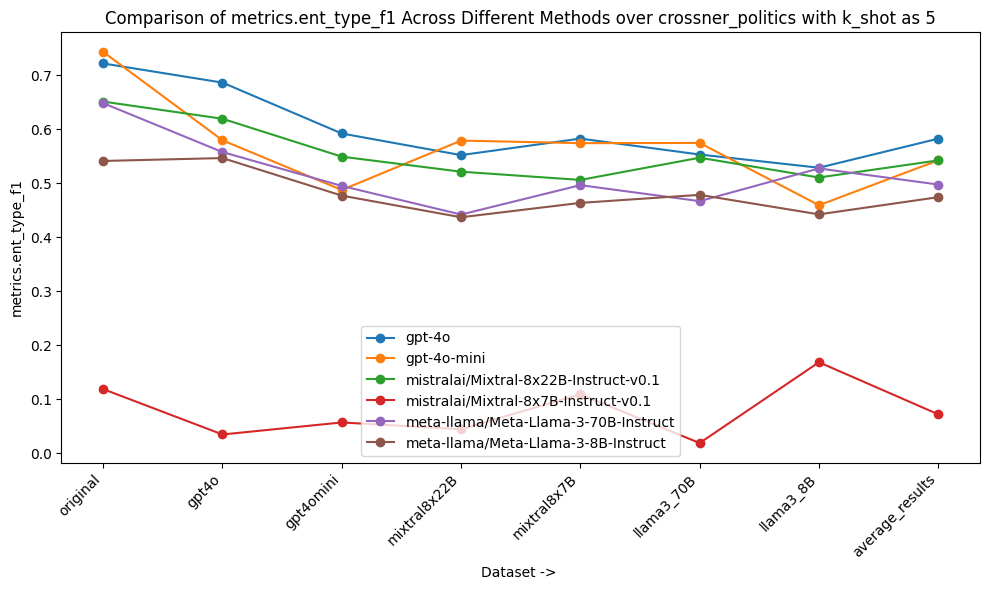

In [558]:
combined_graph_vn(all_runs, dataset="crossner_politics", measure="metrics.ent_type_f1", k_shot=5, task="ner")

{'original': {'gpt-4o': 0.872595281306715, 'gpt-4o-mini': 0.8593979441997063, 'meta-llama/Meta-Llama-3-70B-Instruct': 0.8394648829431439, 'meta-llama/Meta-Llama-3-8B-Instruct': 0.8287752675386445, 'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.8092485549132948, 'mistralai/Mixtral-8x7B-Instruct-v0.1': 0.21437578814627994}, 'gpt4o': {'gpt-4o': 0.8654066437571593, 'gpt-4o-mini': 0.7360355907068711, 'meta-llama/Meta-Llama-3-70B-Instruct': 0.7740641711229946, 'meta-llama/Meta-Llama-3-8B-Instruct': 0.860990860990861, 'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.8495117748420448, 'mistralai/Mixtral-8x7B-Instruct-v0.1': 0.050397877984084884}, 'gpt4omini': {'gpt-4o': 0.8218554354012522, 'gpt-4o-mini': 0.6848541862652868, 'meta-llama/Meta-Llama-3-70B-Instruct': 0.7740259740259741, 'meta-llama/Meta-Llama-3-8B-Instruct': 0.8654390934844193, 'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.8600217864923748, 'mistralai/Mixtral-8x7B-Instruct-v0.1': 0.08645161290322582}, 'mixtral8x22B': {'gpt-4o': 0.7381671701913

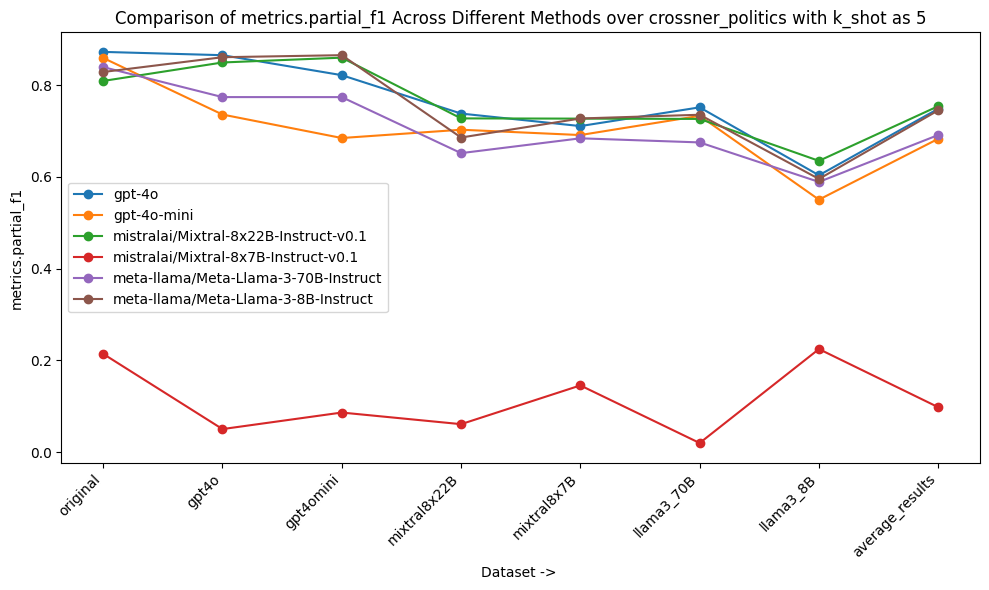

In [549]:
combined_graph_vn(all_runs, dataset="crossner_politics", measure="metrics.en", k_shot=5, task="ner")

In [599]:
def combined_graph_vn(all_runs, dataset, measure, k_shot=1, number_of_examples=200,  task="text_similarity", number_of_examples_for_original_dataset="200"):
    
    def temp(df, dataset=dataset, llm="gpt-4o",  generated="True"):
        df = df[(df["params.number_of_examples_for_original_dataset"] == number_of_examples_for_original_dataset)]
        if generated == "True":
            df = df[(df["params.dataset"] == dataset) & (df["params.llm"] == llm) & (df["params.generated"] == generated)]
            df = df[(df["params.number_of_examples_per_score"] == str(k_shot)) & (df["params.number_of_examples"] == str(number_of_examples))]
        else:
            df = df[(df["params.dataset"] == dataset) & (df["params.generated"] == generated) & (df["params.task"] == task)]
            
        return df[["params.method", measure]]
    
    def transform_to_dict(df):
        all_methods = []
        all_results = []
        for row in df.iterrows():
            all_methods.append(row[1][0])
            all_results.append(row[1][1])
        output_dict = {method:result for method, result in zip(all_methods, all_results)}
        return dict(sorted(output_dict.items()))
    
    
    def find_avg_results(all_dicts):
        methods = all_dicts[0].keys()
        avg_results = {}
        for m in methods:
            temp_avg = []
            for all_dict in all_dicts:
                temp_avg.append(all_dict[m])
            avg_results[m] = np.mean(temp_avg)
        return avg_results
    
    # print(temp(all_runs, llm="gpt-4o"))
    
    
    gpt4o = transform_to_dict(temp(all_runs, llm="gpt-4o")) # performance of various models using gpt-4o data
    gpt4omini = transform_to_dict(temp(all_runs, llm="gpt-4o-mini"))
    mixtral8x22B = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x22B-Instruct-v0.1"))
    mixtral8x7B = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x7B-Instruct-v0.1"))
    llama3_70B = transform_to_dict(temp(all_runs, llm="meta-llama/Meta-Llama-3-70B-Instruct"))
    llama3_8B = transform_to_dict(temp(all_runs, llm="meta-llama/Meta-Llama-3-8B-Instruct"))
    original = transform_to_dict(temp(all_runs, llm="", generated="False"))
    average_results = find_avg_results([gpt4o, gpt4omini, mixtral8x22B, mixtral8x7B, llama3_70B, llama3_8B])
    # average_results = find_avg_results([gpt4o, claude_sonnet])
    
        
    dataset_to_results = {
        
        "original": original,
        "gpt4o": gpt4o,
        "gpt4omini": gpt4omini,
        "mixtral8x22B": mixtral8x22B,
        "mixtral8x7B": mixtral8x7B,
        "llama3_70B": llama3_70B,
        "llama3_8B": llama3_8B,
        "average_results": average_results
    }
    
    # print(dataset_to_results)
        
    
    # pr = pearsonr([value for key,value in gpt4o.items()], [value for key,value in original.items()])
    # print(pr)
    # pr = pearsonr([value for key,value in average_results.items()], [value for key,value in original.items()])
    # print(pr)
    pr_dict = {}
    sr_dict = {}
    
    
    llms_to_consider = ["gpt-4o", "gpt-4o-mini", "mistralai/Mixtral-8x22B-Instruct-v0.1","mistralai/Mixtral-8x7B-Instruct-v0.1","meta-llama/Meta-Llama-3-70B-Instruct", "meta-llama/Meta-Llama-3-8B-Instruct" ]
    
    for dataset_name, results in dataset_to_results.items():
        if dataset_name  == "original":
            continue  
        pr = pearsonr([value for key,value in results.items() if key in llms_to_consider], [value for key,value in original.items() if key in llms_to_consider])
        sr = spearmanr([value for key,value in results.items() if key in llms_to_consider], [value for key,value in original.items() if key in llms_to_consider])
        pr_dict[dataset_name] = round(pr[0],2)
        sr_dict[dataset_name] = round(sr[0],2)

    print("pearsonr")   
    pprint(pr_dict)
    
    print("spearmanr")   
    pprint(sr_dict)
    
    
    all_methods = [m for m, r in gpt4o.items()]
    
    
    def get_results_from_method(method_name):
        temp_results = []
        for key, value in dataset_to_results.items():
            temp_results.append(value[method_name])
            
        return temp_results
    
    # print("******************")
    # print(dataset_to_results)
    
    
    
    # performance of gpt4 on various dataset
    # find the performance of gpt4 on 
    
    all_datasets = dataset_to_results.keys()
    
    
    methods = list(gpt4o.keys())
    plt.figure(figsize=(10, 6))
    
    # print(get_results_from_method(method_name="gpt-4o"))

    plt.plot(all_datasets, get_results_from_method(method_name="gpt-4o"), marker='o', label='gpt-4o')
    plt.plot(all_datasets, get_results_from_method(method_name="gpt-4o-mini"), marker='o', label='gpt-4o-mini')
    plt.plot(all_datasets, get_results_from_method(method_name="mistralai/Mixtral-8x22B-Instruct-v0.1"), marker='o', label='mistralai/Mixtral-8x22B-Instruct-v0.1')
    plt.plot(all_datasets, get_results_from_method(method_name="mistralai/Mixtral-8x7B-Instruct-v0.1"), marker='o', label='mistralai/Mixtral-8x7B-Instruct-v0.1')
    plt.plot(all_datasets, get_results_from_method(method_name="meta-llama/Meta-Llama-3-70B-Instruct"), marker='o', label='meta-llama/Meta-Llama-3-70B-Instruct')
    plt.plot(all_datasets, get_results_from_method(method_name="meta-llama/Meta-Llama-3-8B-Instruct"), marker='o', label='meta-llama/Meta-Llama-3-8B-Instruct')



    plt.xlabel('Dataset -> ')
    plt.ylabel(f'{measure}')
    plt.title(f'Comparison of {measure} Across Different Methods over {dataset} with k_shot as {k_shot}')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


    plt.show()
    
    return dataset_to_results

pearsonr
{'average_results': 0.98,
 'gpt4o': 0.97,
 'gpt4omini': 0.95,
 'llama3_70B': 0.99,
 'llama3_8B': 0.98,
 'mixtral8x22B': 0.99,
 'mixtral8x7B': 0.98}
spearmanr
{'average_results': 0.83,
 'gpt4o': 0.77,
 'gpt4omini': 0.37,
 'llama3_70B': 0.94,
 'llama3_8B': 0.71,
 'mixtral8x22B': 0.83,
 'mixtral8x7B': 0.6}


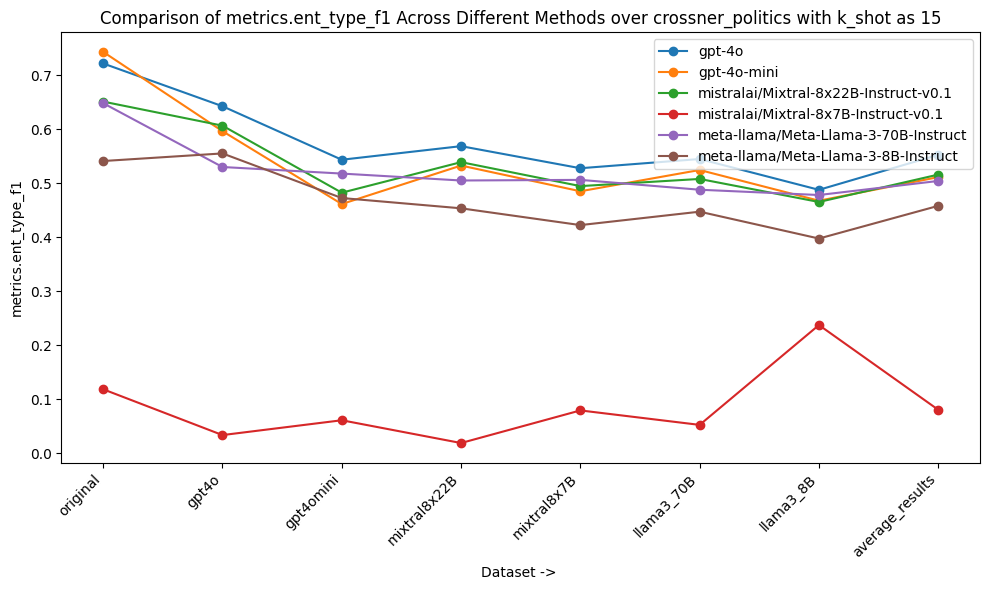

In [609]:
dataset_to_results = combined_graph_vn(all_runs, dataset="crossner_politics", measure="metrics.ent_type_f1", k_shot=15, task="ner")

In [613]:
model_name = "mistralai/Mixtral-8x7B-Instruct-v0.1"
dataset_name = "mixtral8x7B"

def bias_factor(model_name, dataset_name, dataset_to_results):
    #dataset_to_results
    for key, value in dataset_to_results.items():
        value["avg"] = np.mean([r for m, r in value.items()])
        dataset_to_results[key] = value

    temp = []

    for key, value in dataset_to_results.items():
        model_results = round(value[model_name],2)
        average_results = round(value['avg'],2)
        diff = round(model_results - average_results,2)
        temp.append((key, diff))


    def sort_fun(e):
        return e[1]


    temp.sort(key=sort_fun, reverse=True)

    return temp

In [611]:
model_names = ['gpt-4o', 'gpt-4o-mini', 'meta-llama/Meta-Llama-3-70B-Instruct', 'meta-llama/Meta-Llama-3-8B-Instruct', 'mistralai/Mixtral-8x22B-Instruct-v0.1', 'mistralai/Mixtral-8x7B-Instruct-v0.1']
dataset_names = ['gpt4o', 'gpt4omini', 'llama3_70B', 'llama3_8B', 'mixtral8x22B', 'mixtral8x7B']

In [612]:
for k in range(len(model_names)):
    print(f"model considered {model_names[k]}")
    pprint(bias_factor(model_names[k], dataset_names[k]))

model considered gpt-4o
[('original', 0.15),
 ('gpt4o', 0.15),
 ('mixtral8x22B', 0.13),
 ('gpt4omini', 0.12),
 ('mixtral8x7B', 0.11),
 ('llama3_70B', 0.11),
 ('average_results', 0.11),
 ('llama3_8B', 0.07)]
model considered gpt-4o-mini
[('original', 0.17),
 ('gpt4o', 0.11),
 ('mixtral8x22B', 0.09),
 ('llama3_70B', 0.09),
 ('mixtral8x7B', 0.07),
 ('average_results', 0.07),
 ('llama3_8B', 0.05),
 ('gpt4omini', 0.04)]
model considered meta-llama/Meta-Llama-3-70B-Instruct
[('gpt4omini', 0.1),
 ('mixtral8x7B', 0.09),
 ('original', 0.08),
 ('mixtral8x22B', 0.06),
 ('llama3_70B', 0.06),
 ('llama3_8B', 0.06),
 ('average_results', 0.06),
 ('gpt4o', 0.04)]
model considered meta-llama/Meta-Llama-3-8B-Instruct
[('gpt4o', 0.07),
 ('gpt4omini', 0.05),
 ('llama3_70B', 0.02),
 ('average_results', 0.02),
 ('mixtral8x22B', 0.01),
 ('mixtral8x7B', 0.0),
 ('llama3_8B', -0.02),
 ('original', -0.03)]
model considered mistralai/Mixtral-8x22B-Instruct-v0.1
[('gpt4o', 0.12),
 ('mixtral8x22B', 0.1),
 ('original

In [631]:
# lets calculate bias of gpt-4o
for k in range(0,len(model_names)):
    model_name = model_names[k]
    dataset_name = dataset_names[k]

    # step1 - calculate normalized performance for all methods for all dataset

    dataset_to_normalized_results = {}


    for dataset, result in dataset_to_results.items():
        if dataset == "original":
            continue
        average = np.mean([value for key, value in result.items()])
        temp = {}
        for key, value in result.items():
            if key == 'avg':
                continue
            temp[key] = value - average

        dataset_to_normalized_results[dataset] = temp


    bias_factor = dataset_to_normalized_results[dataset_name][model_name] - np.mean([dataset_to_normalized_results[d][model_name] for d in dataset_names if d != dataset_name])
    print(f"bias factor for {model_name} is {bias_factor}")

bias factor for gpt-4o is 0.03969812677350132
bias factor for gpt-4o-mini is -0.0430711347373751
bias factor for meta-llama/Meta-Llama-3-70B-Instruct is -0.007992931456794083
bias factor for meta-llama/Meta-Llama-3-8B-Instruct is -0.0548654389595953
bias factor for mistralai/Mixtral-8x22B-Instruct-v0.1 is 0.02857642066982559
bias factor for mistralai/Mixtral-8x7B-Instruct-v0.1 is 0.019996830082670947


In [620]:
dataset_to_normalized_results

{'gpt4o': {'gpt-4o': 0.14844639819417776,
  'gpt-4o-mini': 0.10229278790435631,
  'meta-llama/Meta-Llama-3-70B-Instruct': 0.03594255549648567,
  'meta-llama/Meta-Llama-3-8B-Instruct': 0.061089152430556626,
  'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.11246823337837103,
  'mistralai/Mixtral-8x7B-Instruct-v0.1': -0.4602391274039472},
 'gpt4omini': {'gpt-4o': 0.12027621431478008,
  'gpt-4o-mini': 0.03827884648457125,
  'meta-llama/Meta-Llama-3-70B-Instruct': 0.09467937049427289,
  'meta-llama/Meta-Llama-3-8B-Instruct': 0.04941761861690924,
  'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.05927232809290628,
  'mistralai/Mixtral-8x7B-Instruct-v0.1': -0.3619243780034397},
 'mixtral8x22B': {'gpt-4o': 0.13227127495765273,
  'gpt-4o-mini': 0.09635875188589244,
  'meta-llama/Meta-Llama-3-70B-Instruct': 0.06870666913067408,
  'meta-llama/Meta-Llama-3-8B-Instruct': 0.017220529132266016,
  'mistralai/Mixtral-8x22B-Instruct-v0.1': 0.1026679829073715,
  'mistralai/Mixtral-8x7B-Instruct-v0.1': -0.41722520

pearsonr
{'average_results': 0.78,
 'gpt4o': 0.71,
 'gpt4omini': 0.71,
 'llama3_70B': 0.88,
 'llama3_8B': 0.73,
 'mixtral8x22B': 0.79,
 'mixtral8x7B': 0.87}
spearmanr
{'average_results': 0.83,
 'gpt4o': 0.83,
 'gpt4omini': 0.83,
 'llama3_70B': 0.94,
 'llama3_8B': 0.77,
 'mixtral8x22B': 0.94,
 'mixtral8x7B': 0.77}


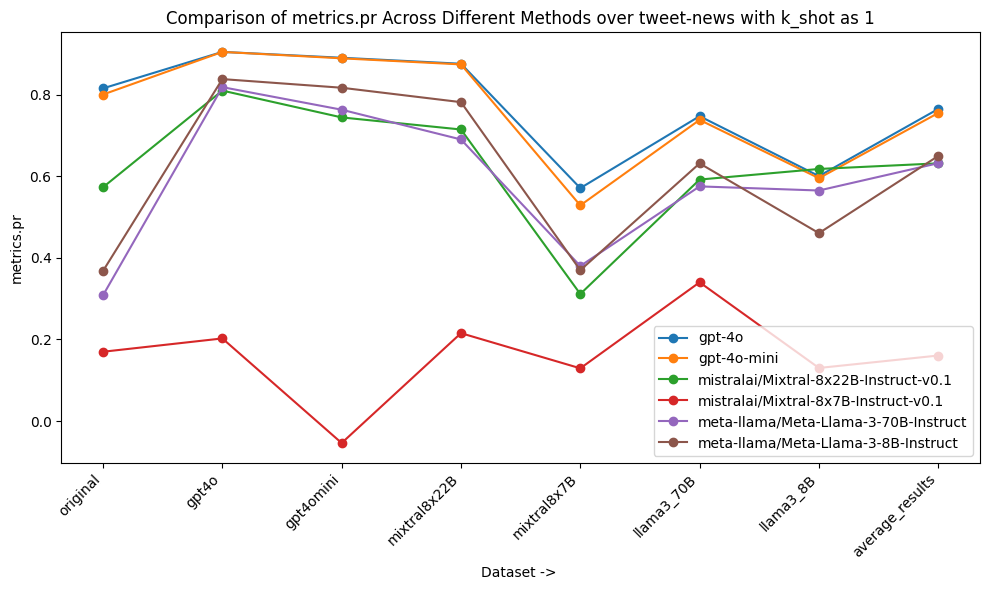

bias factor for gpt-4o is -0.009
bias factor for gpt-4o-mini is 0.07
bias factor for meta-llama/Meta-Llama-3-70B-Instruct is -0.074
bias factor for meta-llama/Meta-Llama-3-8B-Instruct is -0.102
bias factor for mistralai/Mixtral-8x22B-Instruct-v0.1 is -0.012
bias factor for mistralai/Mixtral-8x7B-Instruct-v0.1 is 0.223


In [649]:
# all commands to generate all tables 

dataset_to_results = combined_graph_vn(all_runs, dataset="tweet-news", measure="metrics.pr", k_shot=1, task="text_similarity")
# combined_graph_vn(all_runs, dataset="crossner_politics", measure="metrics.partial_f1", k_shot=5, task="ner")
# combined_graph_vn(all_runs, dataset="crossner_politics", measure="metrics.exact_f1", k_shot=5, task="ner")
# combined_graph_vn(all_runs, dataset="crossner_literature", measure="metrics.ent_type_f1", k_shot=5, task="ner")
# combined_graph_vn(all_runs, dataset="crossner_literature", measure="metrics.partial_f1", k_shot=5, task="ner")
# combined_graph_vn(all_runs, dataset="crossner_literature", measure="metrics.exact_f1", k_shot=5, task="ner")


for k in range(0,len(model_names)):
    model_name = model_names[k]
    dataset_name = dataset_names[k]

    # step1 - calculate normalized performance for all methods for all dataset

    dataset_to_normalized_results = {}


    for dataset, result in dataset_to_results.items():
        if dataset == "original":
            continue
        average = np.mean([value for key, value in result.items()])
        temp = {}
        for key, value in result.items():
            if key == 'avg':
                continue
            temp[key] = value - average

        dataset_to_normalized_results[dataset] = temp


    bias_factor = dataset_to_normalized_results[dataset_name][model_name] - np.mean([dataset_to_normalized_results[d][model_name] for d in dataset_names if d != dataset_name])
    print(f"bias factor for {model_name} is {round(bias_factor,3)}")

In [684]:
def combined_graph_vn(all_runs, dataset, measure, k_shot=1, number_of_examples=200,  task="text_similarity", number_of_examples_for_original_dataset="200"):
    
    def temp(df, dataset=dataset, llm="gpt-4o",  generated="True"):
        df = df[(df["params.number_of_examples_for_original_dataset"] == number_of_examples_for_original_dataset)]
        if generated == "True":
            df = df[(df["params.dataset"] == dataset) & (df["params.llm"] == llm) & (df["params.generated"] == generated)]
            df = df[(df["params.number_of_examples_per_score"] == str(k_shot)) & (df["params.number_of_examples"] == str(number_of_examples))]
        else:
            df = df[(df["params.dataset"] == dataset) & (df["params.generated"] == generated) & (df["params.task"] == task)]
            
        return df[["params.method", measure]]
    
    def transform_to_dict(df):
        all_methods = []
        all_results = []
        for row in df.iterrows():
            all_methods.append(row[1][0])
            all_results.append(row[1][1])
        output_dict = {method:result for method, result in zip(all_methods, all_results)}
        return dict(sorted(output_dict.items()))
    
    
    def find_avg_results(all_dicts):
        methods = all_dicts[0].keys()
        avg_results = {}
        for m in methods:
            temp_avg = []
            for all_dict in all_dicts:
                temp_avg.append(all_dict[m])
            avg_results[m] = np.mean(temp_avg)
        return avg_results
    
    # print(temp(all_runs, llm="gpt-4o"))
    
    
    gpt4o = transform_to_dict(temp(all_runs, llm="gpt-4o")) # performance of various models using gpt-4o data
    gpt4omini = transform_to_dict(temp(all_runs, llm="gpt-4o-mini"))
    mixtral8x22B = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x22B-Instruct-v0.1"))
    mixtral8x7B = transform_to_dict(temp(all_runs, llm="mistralai/Mixtral-8x7B-Instruct-v0.1"))
    llama3_70B = transform_to_dict(temp(all_runs, llm="meta-llama/Meta-Llama-3-70B-Instruct"))
    llama3_8B = transform_to_dict(temp(all_runs, llm="meta-llama/Meta-Llama-3-8B-Instruct"))
    original = transform_to_dict(temp(all_runs, llm="", generated="False"))
    average_results = find_avg_results([gpt4o, gpt4omini, mixtral8x22B, mixtral8x7B, llama3_70B, llama3_8B])
    # average_results = find_avg_results([gpt4o, claude_sonnet])
    
        
    dataset_to_results = {
        
        "original": original,
        "gpt4o": gpt4o,
        "gpt4omini": gpt4omini,
        "mixtral8x22B": mixtral8x22B,
        "mixtral8x7B": mixtral8x7B,
        "llama3_70B": llama3_70B,
        "llama3_8B": llama3_8B,
        "average_results": average_results
    }
    
    # print(dataset_to_results)
        
    
    # pr = pearsonr([value for key,value in gpt4o.items()], [value for key,value in original.items()])
    # print(pr)
    # pr = pearsonr([value for key,value in average_results.items()], [value for key,value in original.items()])
    # print(pr)
    pr_dict = {}
    sr_dict = {}
    
    
    def mse_error(a,b):
        r = [(i-j)**2 for i, j in zip(a,b)]
        return sum(r)/len(r)
    
    llms_to_consider = ["gpt-4o", "gpt-4o-mini", "mistralai/Mixtral-8x22B-Instruct-v0.1","mistralai/Mixtral-8x7B-Instruct-v0.1","meta-llama/Meta-Llama-3-70B-Instruct", "meta-llama/Meta-Llama-3-8B-Instruct" ]
    
    for dataset_name, results in dataset_to_results.items():
        if dataset_name  == "original":
            continue  
        pr = mse_error([value for key,value in results.items() if key in llms_to_consider], [value for key,value in original.items() if key in llms_to_consider])
        sr = spearmanr([value for key,value in results.items() if key in llms_to_consider], [value for key,value in original.items() if key in llms_to_consider])
        pr_dict[dataset_name] = round(pr,2)
        sr_dict[dataset_name] = round(sr[0],2)

    print("mse")   
    pprint(pr_dict)
    
    print("spearmanr")   
    pprint(sr_dict)
    
    
    all_methods = [m for m, r in gpt4o.items()]
    
    
    def get_results_from_method(method_name):
        temp_results = []
        for key, value in dataset_to_results.items():
            temp_results.append(value[method_name])
            
        return temp_results
    
    # print("******************")
    # print(dataset_to_results)
    
    
    
    # performance of gpt4 on various dataset
    # find the performance of gpt4 on 
    
    all_datasets = dataset_to_results.keys()
    
    
    methods = list(gpt4o.keys())
    plt.figure(figsize=(10, 6))
    
    # print(get_results_from_method(method_name="gpt-4o"))

    plt.plot(all_datasets, get_results_from_method(method_name="gpt-4o"), marker='o', label='gpt-4o')
    plt.plot(all_datasets, get_results_from_method(method_name="gpt-4o-mini"), marker='o', label='gpt-4o-mini')
    plt.plot(all_datasets, get_results_from_method(method_name="mistralai/Mixtral-8x22B-Instruct-v0.1"), marker='o', label='mistralai/Mixtral-8x22B-Instruct-v0.1')
    plt.plot(all_datasets, get_results_from_method(method_name="mistralai/Mixtral-8x7B-Instruct-v0.1"), marker='o', label='mistralai/Mixtral-8x7B-Instruct-v0.1')
    plt.plot(all_datasets, get_results_from_method(method_name="meta-llama/Meta-Llama-3-70B-Instruct"), marker='o', label='meta-llama/Meta-Llama-3-70B-Instruct')
    plt.plot(all_datasets, get_results_from_method(method_name="meta-llama/Meta-Llama-3-8B-Instruct"), marker='o', label='meta-llama/Meta-Llama-3-8B-Instruct')



    plt.xlabel('Dataset -> ')
    plt.ylabel(f'{measure}')
    plt.title(f'Comparison of {measure} Across Different Methods over {dataset} with k_shot as {k_shot}')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


    plt.show()
    
    return dataset_to_results

mse
{'average_results': 0.05,
 'gpt4o': 0.12,
 'gpt4omini': 0.12,
 'llama3_70B': 0.04,
 'llama3_8B': 0.03,
 'mixtral8x22B': 0.09,
 'mixtral8x7B': 0.03}
spearmanr
{'average_results': 0.94,
 'gpt4o': 0.94,
 'gpt4omini': 0.77,
 'llama3_70B': 1.0,
 'llama3_8B': 0.54,
 'mixtral8x22B': 0.77,
 'mixtral8x7B': 0.94}


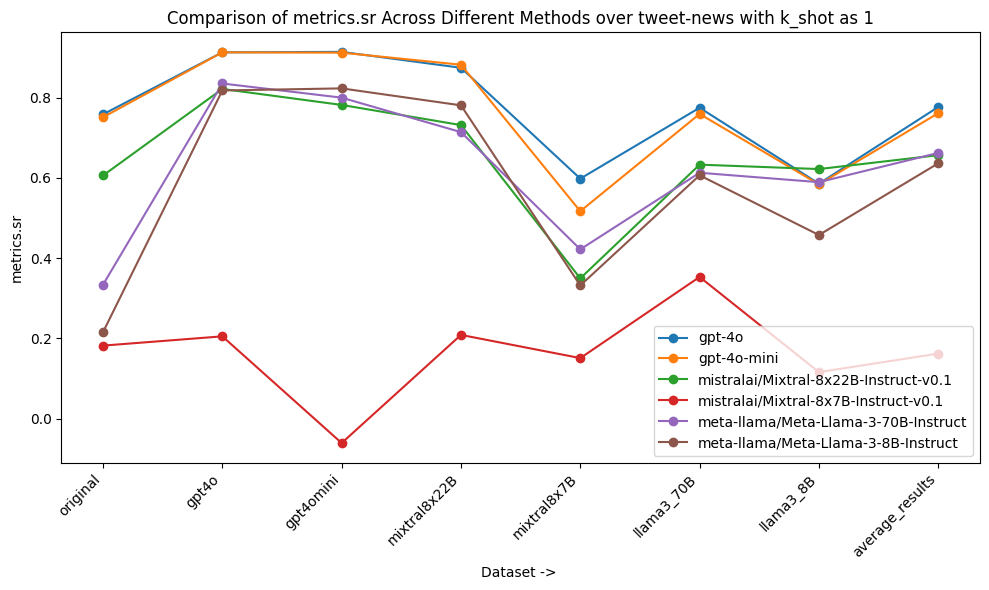

In [688]:
dataset_to_results = combined_graph_vn(all_runs, dataset="tweet-news", measure="metrics.sr", k_shot=1, task="text_similarity")

mse
{'average_results': 0.0,
 'gpt4o': 0.0,
 'gpt4omini': 0.0,
 'llama3_70B': 0.0,
 'llama3_8B': 0.0,
 'mixtral8x22B': 0.01,
 'mixtral8x7B': 0.0}
spearmanr
{'average_results': 0.94,
 'gpt4o': 0.94,
 'gpt4omini': 0.9,
 'llama3_70B': 0.83,
 'llama3_8B': 0.94,
 'mixtral8x22B': 0.94,
 'mixtral8x7B': 0.94}


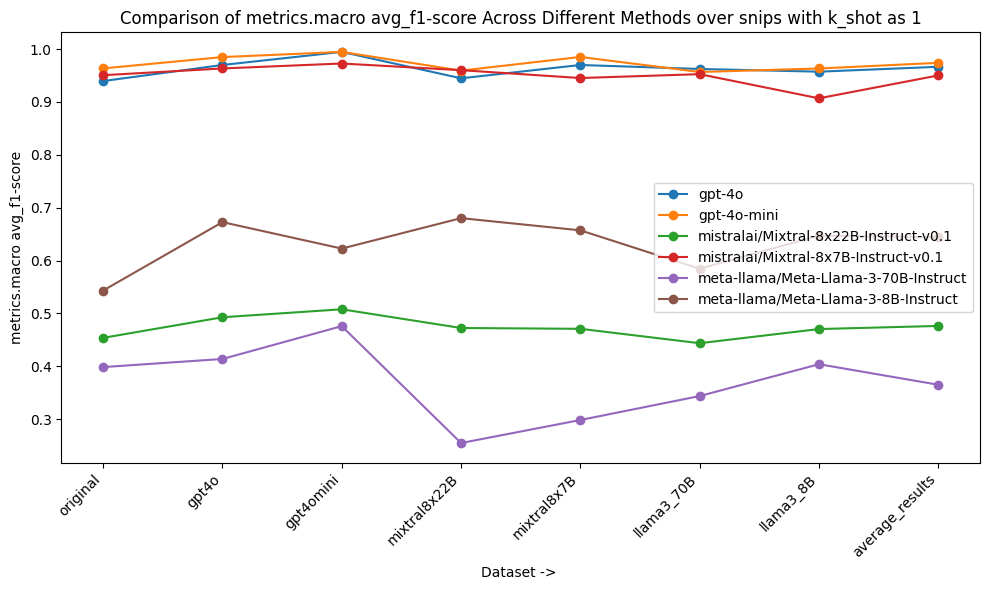

In [671]:
dataset_to_results = combined_graph_vn(all_runs, dataset="snips", measure="metrics.macro avg_f1-score", k_shot=1, task="intent")